In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
%matplotlib inline
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['axes.titlesize'] = 16

In [6]:
typeSpecification = {"Aircraft Model": str, "Engine Model": str, "Engine3 Position": str, "Engine1 Position": str}
df = pd.read_csv('../database/aircraft_wildlife_strikes.zip', compression='zip', dtype=typeSpecification)
df.head(10)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
5,129734,1990,1,4,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
6,129735,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,129736,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,129737,1990,1,6,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,127848,1990,1,7,EME,METRO EXPRESS,DHC8 DASH 8,A,303,10,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Height', ylabel='Windshield Damage'>

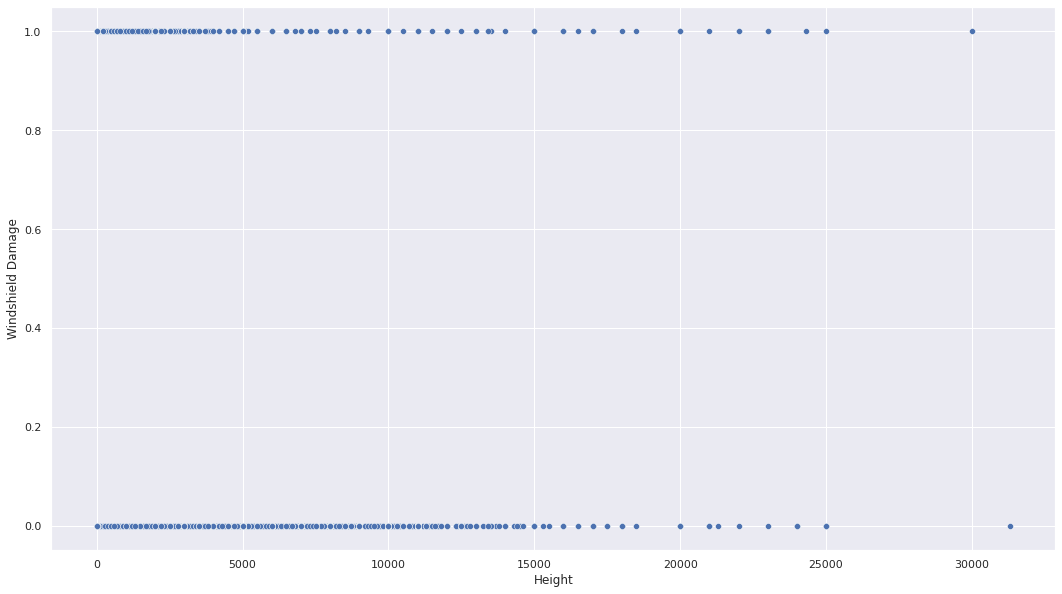

In [7]:
sns.scatterplot(x=df["Height"], y=df["Windshield Damage"])

In [11]:
dados_interesse = df[['Height', 'Windshield Damage']].dropna()

treino_x, teste_x, treino_y, teste_y = train_test_split(dados_interesse["Height"], dados_interesse["Windshield Damage"])

treino_x = np.array(treino_x).reshape(-1,1)
teste_x = np.array(teste_x).reshape(-1,1)

modelo = LogisticRegression()
modelo = modelo.fit(treino_x,treino_y)

(teste_y == modelo.predict(teste_x)).mean()

0.9916666666666667